In [2]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [7]:
start = pd.datetime(2016, 1, 2)
end = pd.datetime(2019, 12, 30)

price = web.DataReader('DJIA', 'fred', start, end)
returns=price.pct_change()

last_price=price.DJIA[-1]
print(last_price)

28462.14


In [13]:
#simulation
num_simulation=1000
num_days=252

df_s=pd.DataFrame()

for x in range(num_simulation):
    count=0
    vol=returns.DJIA.std()
    price=last_price*(1+np.random.normal(0, vol))
    price_series=[]
    price_series.append(price)
    
    for y in range(num_days):
        if count==251:
            break
        price=price_series[count]*(1+np.random.normal(0,vol))
        price_series.append(price)
        count+=1
        
    df_s[x]=price_series

df_s.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,27919.408098,28357.210100,28755.828013,28510.966266,28336.680741,28635.731634,28528.145845,28639.827178,28565.402645,28881.100790,...,28382.141069,28220.204420,28638.578286,28906.280700,28215.369995,28390.249682,28113.827529,28160.107287,28277.949392,28713.351397
1,27922.384737,28168.550498,28767.398927,28549.732318,28163.616067,28250.914525,28481.220700,28575.232126,28590.575409,29045.112840,...,28273.453747,28592.935748,28431.676647,29011.071442,27930.226193,28054.870855,28103.987056,28230.829652,28150.433424,28339.895365
2,27825.200523,28142.166035,29319.941438,28806.516107,28580.339109,27899.272434,28495.143602,28394.072979,28389.216469,28954.676093,...,28358.071598,28690.190105,28351.163606,28885.613377,27822.133506,27880.909360,27807.632738,28010.051375,28134.584095,28424.175150
3,27817.331994,27858.294409,28864.325639,28784.421227,28454.706411,28020.990085,28851.908953,28169.778907,28538.135833,29075.582946,...,28043.776033,28657.281250,27973.707986,28947.922204,27747.786129,28203.880290,27726.300857,27888.618596,28258.544848,27820.601113
4,28266.257252,27561.385430,28819.121567,29078.967976,28462.840693,28072.292266,28693.778116,27917.818380,28395.266218,28909.038243,...,27853.401522,28667.526206,27492.532883,28903.210971,27815.901170,27952.106686,28059.454563,27819.967914,28263.337872,27835.957090


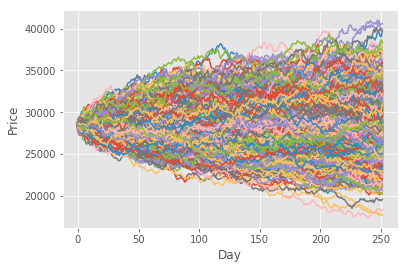

In [5]:
fig=plt.figure()
plt.plot(df_s)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()